In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score,accuracy_score, homogeneity_score,silhouette_samples
from sklearn.mixture import GaussianMixture
import time
import numpy as np
import warnings
import matplotlib.cm as cm
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
from sklearn.linear_model import RidgeCV
import scipy
import scipy.stats
seed = 6
ds_name = "BrainStroke"

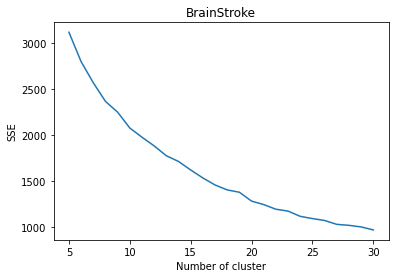

In [53]:
df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


target_column = ['stroke'] 
predictors = list(set(list(df_bs.columns))-set(target_column))
df_bs[predictors] = df_bs[predictors]/df_bs[predictors].max()

X = df_bs[predictors].values
#y = df_bs[target_column].values

y = df_bs['stroke'].copy().values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

clusters = list(range(5,31,1))

sse = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.title(ds_name)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


For n_clusters=2, The Silhouette Coefficient is 0.2501867908416619
For n_clusters=2, The homogeneity_score is 0.036483534941521366
For n_clusters=3, The Silhouette Coefficient is 0.23920343948161163
For n_clusters=3, The homogeneity_score is 0.044154339879927514
For n_clusters=4, The Silhouette Coefficient is 0.2510228215594346
For n_clusters=4, The homogeneity_score is 0.041275669286999134
For n_clusters=5, The Silhouette Coefficient is 0.25931737837003077
For n_clusters=5, The homogeneity_score is 0.04305380853763397
For n_clusters=6, The Silhouette Coefficient is 0.29800227207998387
For n_clusters=6, The homogeneity_score is 0.04642399966118136
For n_clusters=7, The Silhouette Coefficient is 0.31279153138498
For n_clusters=7, The homogeneity_score is 0.0473530771320316
For n_clusters=8, The Silhouette Coefficient is 0.34220028995950036
For n_clusters=8, The homogeneity_score is 0.04846852227508751
For n_clusters=9, The Silhouette Coefficient is 0.34492921405931487
For n_clusters=9, 

Text(0, 0.5, 'Silhouette Coefficient')

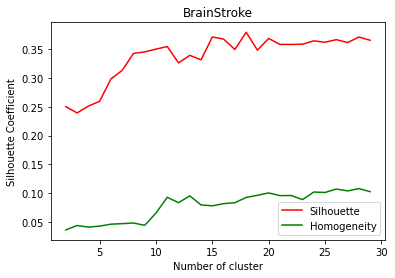

In [12]:
silh = {}
homog = {}
for cluster in range(2, 30, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name)
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

For n_clusters = 4 The average silhouette_score is : 0.2510228215594346
homogeneity_score is 0.041275669286999134
For n_clusters = 10 The average silhouette_score is : 0.3448836206172142
homogeneity_score is 0.07750388136447427
For n_clusters = 18 The average silhouette_score is : 0.3831664521675861
homogeneity_score is 0.09517778213455406
For n_clusters = 24 The average silhouette_score is : 0.36460794838266275
homogeneity_score is 0.10167257260181486


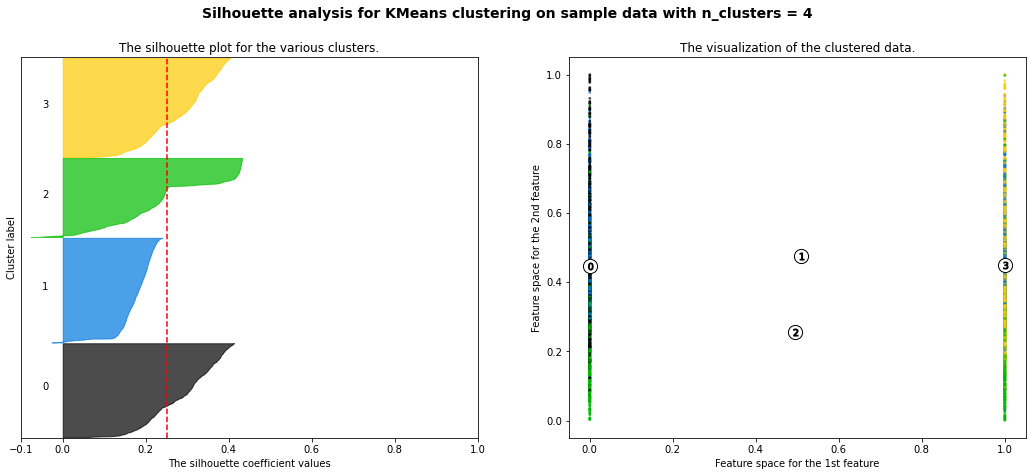

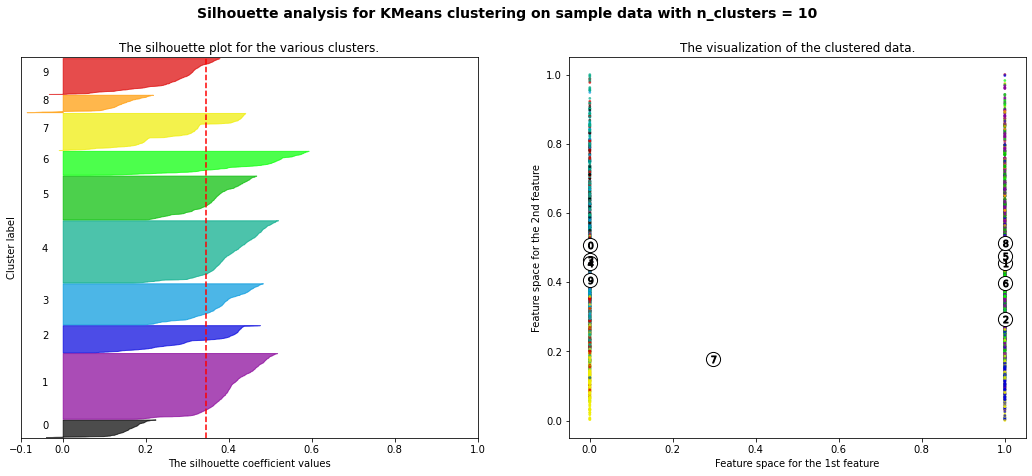

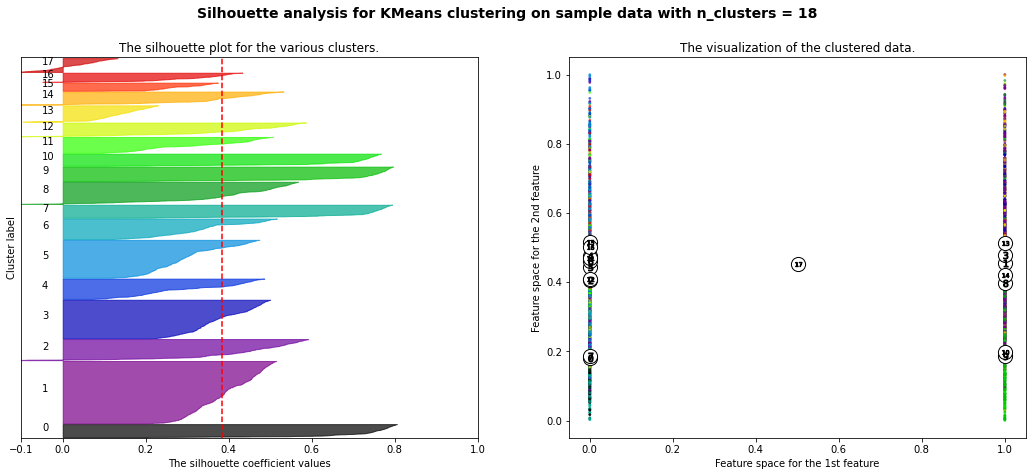

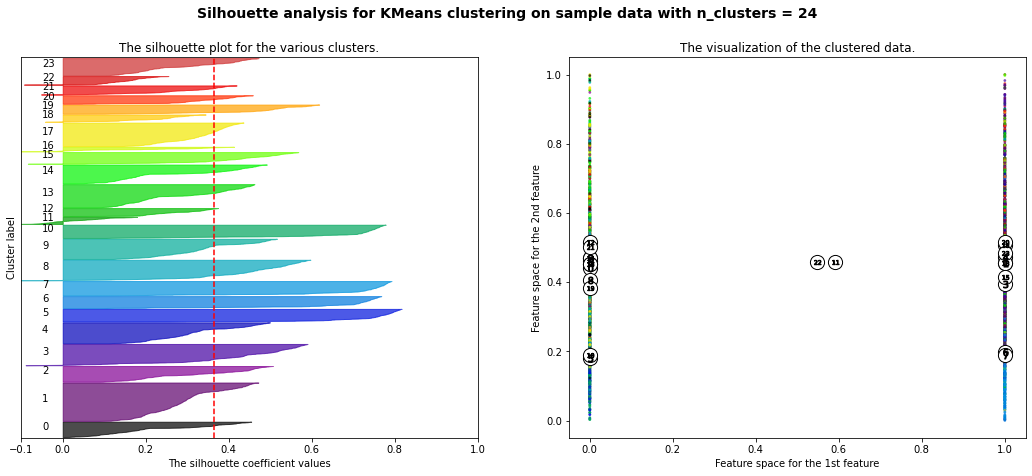

In [13]:
range_n_clusters = [4,10,18,24]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    hom = homogeneity_score(y, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print("homogeneity_score is", hom)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For component=2, The Silhouette Coefficient is 0.2103968895271676
For component=2, The homogeneity_score is 0.00019800626794508957
For component=2, The log_likelihood score is 4.030905760645668
For component=3, The Silhouette Coefficient is 0.19831301533806742
For component=3, The homogeneity_score is 0.0008293216495579922
For component=3, The log_likelihood score is 6.970712701683859
For component=4, The Silhouette Coefficient is 0.223596087456539
For component=4, The homogeneity_score is 0.055715523875002074
For component=4, The log_likelihood score is 10.34743014704188
For component=5, The Silhouette Coefficient is 0.2878214750022196
For component=5, The homogeneity_score is 0.030005286766100387
For component=5, The log_likelihood score is 12.012077494860364
For component=6, The Silhouette Coefficient is 0.2757590632319774
For component=6, The homogeneity_score is 0.039676150860825966
For component=6, The log_likelihood score is 13.564069199772304
For component=7, The Silhouette Coe

Text(0, 0.5, 'log_likelihood Score')

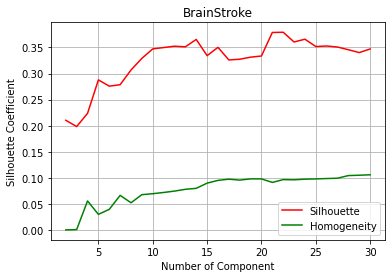

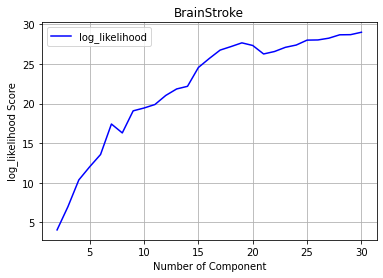

In [17]:
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name)
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

In [69]:
df_bc_x = df_bs.drop("stroke",1)
df_bs.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.817073,0.0,1.0,1.0,0.25,1.0,0.841577,0.748466,0.25,1
1,1.0,0.975610,0.0,1.0,1.0,0.25,0.0,0.389784,0.664622,0.75,1
2,0.0,0.597561,0.0,0.0,1.0,0.25,1.0,0.630124,0.703476,0.50,1
3,0.0,0.963415,1.0,0.0,1.0,0.50,0.0,0.640760,0.490798,0.75,1
4,1.0,0.987805,0.0,0.0,1.0,0.25,1.0,0.685251,0.593047,0.25,1


2 pd dataframe
     gender       age  hypertension  heart_disease  ever_married  work_type  \
0  0.120811 -0.406663     -0.149658      -0.077282     -0.811830   0.259996   
1  0.088663  0.020739      0.018449       0.009758      0.053166  -0.022505   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0       -0.052665          -0.062708 -0.114722        0.212430  
1       -0.993903           0.006650  0.004977       -0.005206  
2 :  0.49357 0.29169248742138504 0.5555682348908415
3 pd dataframe
     gender       age  hypertension  heart_disease  ever_married  work_type  \
0  0.120811 -0.406663     -0.149658      -0.077282     -0.811830   0.259996   
1  0.088663  0.020739      0.018449       0.009758      0.053166  -0.022505   
2  0.985555  0.048347      0.046765       0.064493      0.088635   0.007432   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0       -0.052665          -0.062708 -0.114722        0.212430  
1       -0.993903           0.006650  

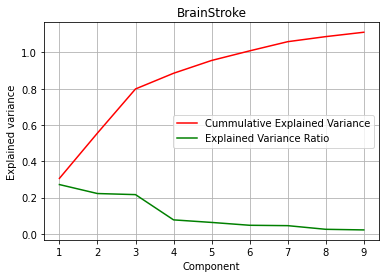

In [60]:
for dim in list(range(2,10,1)):
    pca = PCA(n_components=dim, svd_solver='full',random_state=seed)
    pca.fit_transform(df_bc_x.values)
    
    # reconstruction
    x_prime = pca.fit_transform(df_bc_x.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(df_bc_x.values, reconstructed)    
    print(dim, "pd dataframe")
    print(pd.DataFrame(pca.components_,columns=df_bc_x.columns))
    print(dim, ": ", round(pca.explained_variance_ratio_.sum(),5), rc_err, pca.explained_variance_.sum())
    
plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(np.arange(1, pca.explained_variance_.size + 1), np.cumsum(pca.explained_variance_), 'r', label="Cummulative Explained Variance")
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_,'g', label='Explained Variance Ratio')
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.legend()
pca_for_clus = PCA(n_components=4, svd_solver='full',random_state=seed)
pca_result =  pca_for_clus.fit_transform(df_bc_x.values)

Best Component: 5


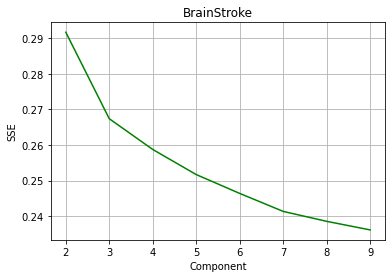

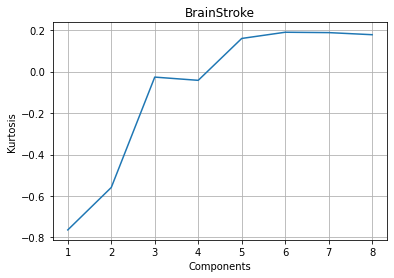

In [61]:
rc_errors = {}
kv = []
for dim in range(2,10):
    ica = FastICA(n_components=dim, random_state=seed)
    x_prime = ica.fit_transform(df_bc_x.values)
    kur = scipy.stats.kurtosis(x_prime)
    kv.append(np.mean(kur)/dim)
kv = np.array(kv)
optimalComponents = np.argmax(kv)
    
print('Best Component: %d' % optimalComponents)

rc_errors = {}
for dim in list(range(2,10,1)):
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(df_bc_x.values)
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(df_bc_x.values, reconstructed)    
    rc_errors[dim] = rc_err
    
plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(list(rc_errors.keys()), list(rc_errors.values()),'g')
plt.xlabel("Component")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.grid()
plt.title(ds_name)
plt.plot(np.arange(1, 9), kv)
plt.xlabel("Components")
plt.ylabel("Kurtosis")
plt.show()
ica = FastICA(n_components=7, random_state=seed)
ica_result = ica.fit_transform(df_bc_x.values)

Total Number of Features: 10
Best Number of RP Components: 2


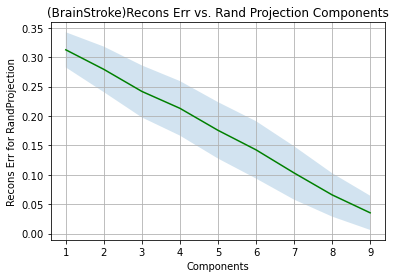

In [70]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,10):
    mean_mse = []
    for j in range(0,500):
        rp = GaussianRandomProjection(n_components=i)
        rp = rp.fit(df_bc_x)
        w = rp.components_
        p = pinv(w)
        reconstructed = ((p@w)@(df_bc_x.T)).T
        mean_mse.append(mean_squared_error(df_bc_x, reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
optimalComponents = np.argmax(reconstruction_error)
 
print('Total Number of Features:', df_bc_x.shape[1])
print('Best Number of RP Components:', optimalComponents+2)

plt.plot(np.arange(1,10),reconstruction_error,'g')
plt.fill_between(np.arange(1,10),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Recons Err for RandProjection')
plt.title('(BrainStroke)Recons Err vs. Rand Projection Components')
plt.grid()
plt.show()
rand_p = GaussianRandomProjection(n_components=2)
rand_p_result = rand_p.fit_transform(df_bc_x.values)

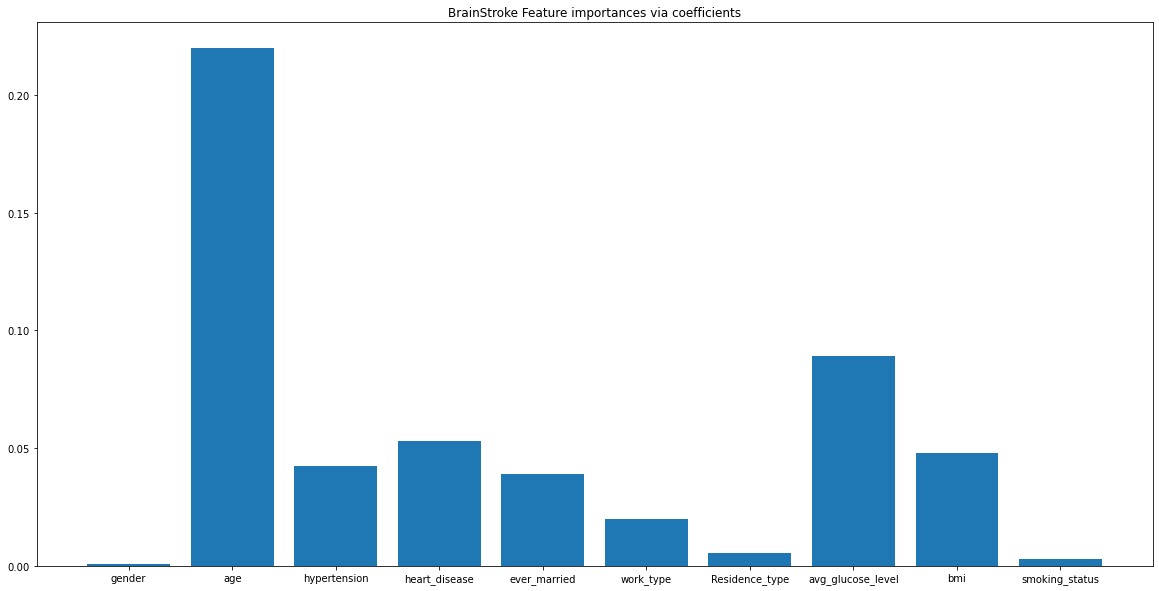

In [64]:
ridge = RidgeCV(alphas=np.logspace(-10, 10, num=5)).fit(df_bc_x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(df_bc_x.columns)
plt.figure(figsize=(20,10))
plt.bar(height=importance, x=feature_names)
plt.title(ds_name + " Feature importances via coefficients")
plt.show()

## PCA ( EM, K-MEANS )

For n_clusters=2, The Silhouette Coefficient is 0.3493294524828601
For n_clusters=2, The homogeneity_score is 0.0365370831013328
For n_clusters=3, The Silhouette Coefficient is 0.3947270930860284
For n_clusters=3, The homogeneity_score is 0.046220412185753346
For n_clusters=4, The Silhouette Coefficient is 0.43892350656275125
For n_clusters=4, The homogeneity_score is 0.06189218917298721
For n_clusters=5, The Silhouette Coefficient is 0.5101285386230512
For n_clusters=5, The homogeneity_score is 0.06239373515947523
For n_clusters=6, The Silhouette Coefficient is 0.5931987507599625
For n_clusters=6, The homogeneity_score is 0.04890797856868362
For n_clusters=7, The Silhouette Coefficient is 0.646314754643375
For n_clusters=7, The homogeneity_score is 0.050862770949218324
For n_clusters=8, The Silhouette Coefficient is 0.7005502993390044
For n_clusters=8, The homogeneity_score is 0.04472900124959999
For n_clusters=9, The Silhouette Coefficient is 0.7348679776576972
For n_clusters=9, The 

For component=25, The Silhouette Coefficient is 0.5760457678657862
For component=25, The homogeneity_score is 0.11148406108273122
For component=25, The log_likelihood score is 10.478783339580287
For component=26, The Silhouette Coefficient is 0.5703274704075083
For component=26, The homogeneity_score is 0.1124061804658042
For component=26, The log_likelihood score is 10.517800093454069
For component=27, The Silhouette Coefficient is 0.5621084137797132
For component=27, The homogeneity_score is 0.11587815942002082
For component=27, The log_likelihood score is 10.545375365211646
For component=28, The Silhouette Coefficient is 0.5564913870429167
For component=28, The homogeneity_score is 0.11903620673879649
For component=28, The log_likelihood score is 10.596740330212803
For component=29, The Silhouette Coefficient is 0.5179113662201476
For component=29, The homogeneity_score is 0.1249621884698125
For component=29, The log_likelihood score is 10.744772010728317
For component=30, The Silho

Text(0, 0.5, 'log_likelihood Score')

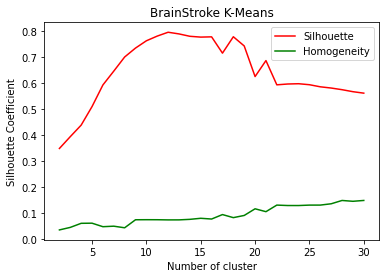

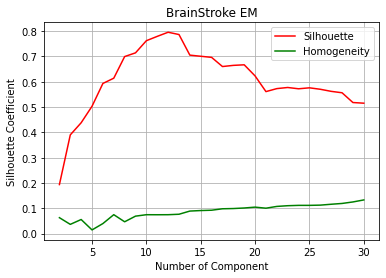

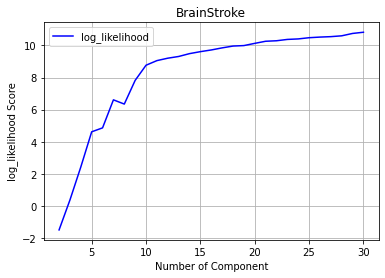

In [65]:
##PCA
silh = {}
homog = {}
adj = {}
X = pca_result

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + " EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## ICA ( EM, K-MEANS )

For n_clusters=2, The Silhouette Coefficient is 0.17117121032477792
For n_clusters=2, The homogeneity_score is 0.0006884704120411239
For n_clusters=3, The Silhouette Coefficient is 0.22961065666011368
For n_clusters=3, The homogeneity_score is 0.040085616213809454
For n_clusters=4, The Silhouette Coefficient is 0.21574656497250794
For n_clusters=4, The homogeneity_score is 0.06803303406633039
For n_clusters=5, The Silhouette Coefficient is 0.29068380526039217
For n_clusters=5, The homogeneity_score is 0.09061137496672639
For n_clusters=6, The Silhouette Coefficient is 0.3047919261353264
For n_clusters=6, The homogeneity_score is 0.09070806559318811
For n_clusters=7, The Silhouette Coefficient is 0.30608317263878443
For n_clusters=7, The homogeneity_score is 0.0923691704853694
For n_clusters=8, The Silhouette Coefficient is 0.3311070748288894
For n_clusters=8, The homogeneity_score is 0.09196195315650448
For n_clusters=9, The Silhouette Coefficient is 0.3547045273524789
For n_clusters=9

For component=24, The Silhouette Coefficient is 0.4326879894022577
For component=24, The homogeneity_score is 0.09940488223415381
For component=24, The log_likelihood score is 31.17917860680079
For component=25, The Silhouette Coefficient is 0.4298351612858647
For component=25, The homogeneity_score is 0.10160463162587768
For component=25, The log_likelihood score is 31.270917393129476
For component=26, The Silhouette Coefficient is 0.4365467852475735
For component=26, The homogeneity_score is 0.10192011946954983
For component=26, The log_likelihood score is 31.501625651235795
For component=27, The Silhouette Coefficient is 0.4484574040035553
For component=27, The homogeneity_score is 0.1032715711489654
For component=27, The log_likelihood score is 31.637831162945
For component=28, The Silhouette Coefficient is 0.4372492599645468
For component=28, The homogeneity_score is 0.10327536703109642
For component=28, The log_likelihood score is 31.68696310388485
For component=29, The Silhouett

Text(0, 0.5, 'log_likelihood Score')

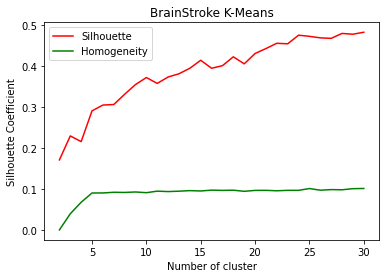

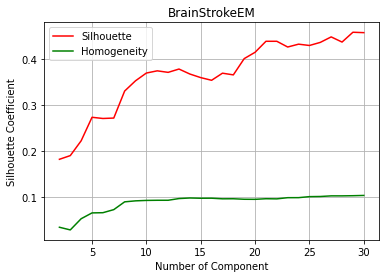

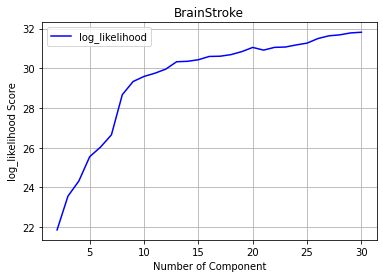

In [66]:
##ICA
silh = {}
homog = {}
adj = {}

X = ica_result

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## Randomized Projections ( EM, K-MEANS )

For n_clusters=2, The Silhouette Coefficient is 0.4194313863250703
For n_clusters=2, The homogeneity_score is 0.0005141296158786388
For n_clusters=3, The Silhouette Coefficient is 0.3629102073265811
For n_clusters=3, The homogeneity_score is 0.002923793409643364
For n_clusters=4, The Silhouette Coefficient is 0.38132856951975463
For n_clusters=4, The homogeneity_score is 0.018101602868745403
For n_clusters=5, The Silhouette Coefficient is 0.371092821104565
For n_clusters=5, The homogeneity_score is 0.016327747135954553
For n_clusters=6, The Silhouette Coefficient is 0.37192914251086734
For n_clusters=6, The homogeneity_score is 0.015848104306626292
For n_clusters=7, The Silhouette Coefficient is 0.37627060337920193
For n_clusters=7, The homogeneity_score is 0.02003444125927907
For n_clusters=8, The Silhouette Coefficient is 0.382858901789263
For n_clusters=8, The homogeneity_score is 0.024926435188411467
For n_clusters=9, The Silhouette Coefficient is 0.3960031350579776
For n_clusters=

For component=24, The Silhouette Coefficient is 0.32370030717835074
For component=24, The homogeneity_score is 0.05092351268353836
For component=24, The log_likelihood score is -1.208922735035815
For component=25, The Silhouette Coefficient is 0.3223848709006873
For component=25, The homogeneity_score is 0.05064550009031972
For component=25, The log_likelihood score is -1.1985142220500091
For component=26, The Silhouette Coefficient is 0.32615158286457163
For component=26, The homogeneity_score is 0.05284358772436928
For component=26, The log_likelihood score is -1.2009533736217402
For component=27, The Silhouette Coefficient is 0.3254502718862489
For component=27, The homogeneity_score is 0.05401428959947725
For component=27, The log_likelihood score is -1.2021916073924064
For component=28, The Silhouette Coefficient is 0.3204928919745329
For component=28, The homogeneity_score is 0.053198347930497075
For component=28, The log_likelihood score is -1.2057377504839053
For component=29, 

Text(0, 0.5, 'log_likelihood Score')

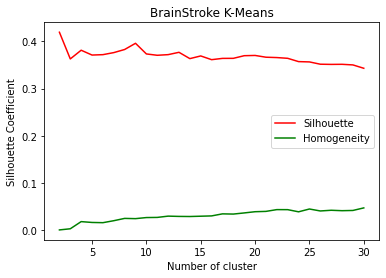

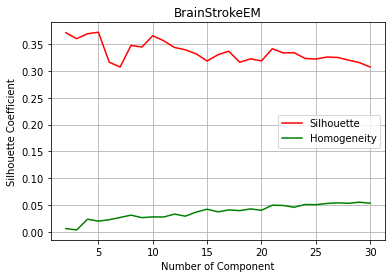

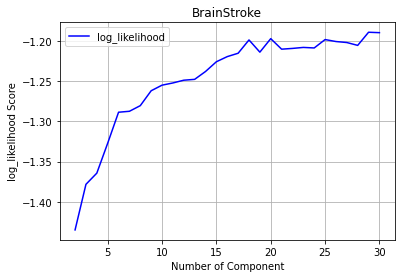

In [71]:
##rand _p
silh = {}
homog = {}
adj = {}

X = rand_p_result

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")

## Feature Importance via coefficients ( EM, K-MEANS )

In [72]:
df_bs_imp = df_bs[['age','avg_glucose_level','bmi','heart_disease']]
df_bs_imp.head()

,age,avg_glucose_level,bmi,heart_disease
0,0.817073,0.841577,0.748466,1.0
1,0.975610,0.389784,0.664622,1.0
2,0.597561,0.630124,0.703476,0.0
3,0.963415,0.640760,0.490798,0.0
4,0.987805,0.685251,0.593047,0.0


For n_clusters=2, The Silhouette Coefficient is 0.306740127268365
For n_clusters=2, The homogeneity_score is 0.11209355972561405
For n_clusters=3, The Silhouette Coefficient is 0.3686884377658757
For n_clusters=3, The homogeneity_score is 0.11476541927779509
For n_clusters=4, The Silhouette Coefficient is 0.4016316611835596
For n_clusters=4, The homogeneity_score is 0.11565049058756528
For n_clusters=5, The Silhouette Coefficient is 0.36853969893655547
For n_clusters=5, The homogeneity_score is 0.13712712050443981
For n_clusters=6, The Silhouette Coefficient is 0.3477278142644174
For n_clusters=6, The homogeneity_score is 0.15030135962269
For n_clusters=7, The Silhouette Coefficient is 0.31647937704026236
For n_clusters=7, The homogeneity_score is 0.16243123644644825
For n_clusters=8, The Silhouette Coefficient is 0.31521677570450807
For n_clusters=8, The homogeneity_score is 0.16583929171952227
For n_clusters=9, The Silhouette Coefficient is 0.30887909927246965
For n_clusters=9, The h

For component=25, The Silhouette Coefficient is 0.20580131384641026
For component=25, The homogeneity_score is 0.20344573548554448
For component=25, The log_likelihood score is 6.910585292285242
For component=26, The Silhouette Coefficient is 0.22113375080362252
For component=26, The homogeneity_score is 0.20387113388824002
For component=26, The log_likelihood score is 6.907218318403389
For component=27, The Silhouette Coefficient is 0.223935519486781
For component=27, The homogeneity_score is 0.20789144038809454
For component=27, The log_likelihood score is 6.906693632489154
For component=28, The Silhouette Coefficient is 0.22948432393568544
For component=28, The homogeneity_score is 0.20564907850400496
For component=28, The log_likelihood score is 6.910007218089355
For component=29, The Silhouette Coefficient is 0.2304841152682862
For component=29, The homogeneity_score is 0.20587143481381048
For component=29, The log_likelihood score is 6.908061503771609
For component=30, The Silhou

Text(0, 0.5, 'log_likelihood Score')

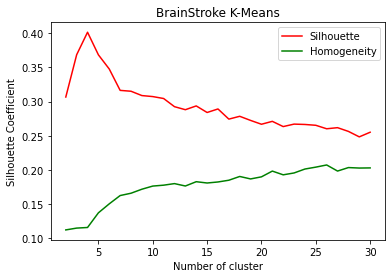

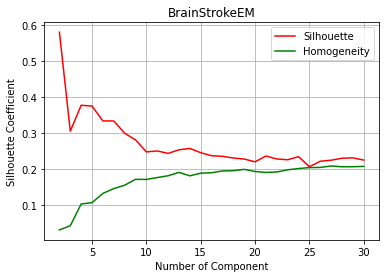

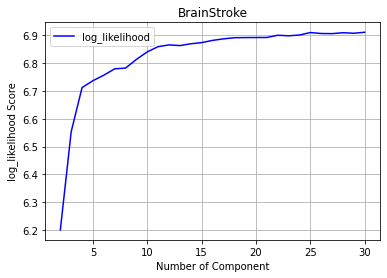

In [73]:
silh = {}
homog = {}
adj = {}

## select only two high coeff features
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_bs_imp)

for cluster in range(2, 31, 1):
    kmeans = KMeans(n_clusters=cluster, max_iter=500, random_state=seed).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    adj_score = adjusted_mutual_info_score((1-kmeans.labels_),y)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    #adj[cluster] = adj_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.title(ds_name + " K-Means")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
#plt.plot(list(adj.keys()), list(adj.values()), 'b', label="Adjusted Mutual Info")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
print("Max KMeans silhouette is:", (max(silh.values())))
print("Max KMeans homogeneity_score is:", (max(homog.values())))
print("----------------")

## EM
silh = {}
homog = {}
log = {}
for cluster in range(2, 31, 1):
    gauss = GaussianMixture(n_components=cluster, max_iter=500, random_state=seed).fit(X)
    label = gauss.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    log[cluster] = gauss.score(X)
    print("For component={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For component={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For component={}, The log_likelihood score is {}".format(cluster, log[cluster]))
plt.figure()
plt.title(ds_name + "EM")
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("Silhouette Coefficient")
print("Max EM silhouette is:", (max(silh.values())))
print("Max EM homogeneity_score is:", (max(homog.values())))
print("----------------")

plt.figure()
plt.title(ds_name)
plt.plot(list(log.keys()), list(log.values()), 'b', label="log_likelihood")
plt.legend()
plt.grid()
plt.xlabel("Number of Component")
plt.ylabel("log_likelihood Score")